# Chicago Crime Analysis
### By Sai Vinay Pabbisetty
## Data source: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C://Users//saivi//Desktop//606 Capstone//ChicagoCrimes//Dataset//Crimes_-_2001_to_present.csv", index_col='Date')

C:\Users\saivi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2001 11:00:00 AM,11034701,JA366925,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
10/08/2017 03:00:00 AM,11227287,JB147188,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
03/28/2017 02:00:00 PM,11227583,JB147595,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
09/09/2017 08:17:00 PM,11227293,JB147230,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
08/26/2017 10:00:00 AM,11227634,JB147599,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7061128 entries, 2001-01-01 11:00:00 to 2017-11-30 09:00:00
Data columns (total 21 columns):
ID                      int64
Case Number             object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(9)
memory usage: 1.1+ GB


In [11]:
print(df.shape)
print(df.head())

(7061128, 21)
                           ID Case Number                 Block  IUCR  \
Date                                                                    
2001-01-01 11:00:00  11034701    JA366925       016XX E 86TH PL  1153   
2017-10-08 03:00:00  11227287    JB147188    092XX S RACINE AVE  0281   
2017-03-28 14:00:00  11227583    JB147595       026XX W 79TH ST  0620   
2017-09-09 20:17:00  11227293    JB147230  060XX S EBERHART AVE  0810   
2017-08-26 10:00:00  11227634    JB147599   001XX W RANDOLPH ST  0281   

                            Primary Type                          Description  \
Date                                                                            
2001-01-01 11:00:00   DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2017-10-08 03:00:00  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
2017-03-28 14:00:00             BURGLARY                       UNLAWFUL ENTRY   
2017-09-09 20:17:00                THEFT                            O

### Handling Nulls & Missing values

In [12]:
df.isna().sum()

ID                           0
Case Number                  4
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      6177
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614830
Community Area          613496
FBI Code                     0
X Coordinate             67616
Y Coordinate             67616
Year                         0
Updated On                   0
Latitude                 67616
Longitude                67616
Location                 67616
dtype: int64

In [13]:
df = df.dropna(subset=['Latitude', 'Longitude', 'Location','X Coordinate','Y Coordinate'])
df = df.drop(columns=['Ward', 'Community Area'])
df.isna().sum()

ID                         0
Case Number                3
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    4075
Arrest                     0
Domestic                   0
Beat                       0
District                  47
FBI Code                   0
X Coordinate               0
Y Coordinate               0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
Location                   0
dtype: int64

In [14]:
df = df.dropna() 
df.isna().sum()

ID                      0
Case Number             0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6989387 entries, 2019-01-03 19:20:00 to 2019-05-26 02:11:00
Data columns (total 19 columns):
ID                      int64
Case Number             object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(5), int64(3), object(9)
memory usage: 973.2+ MB


## EDA :

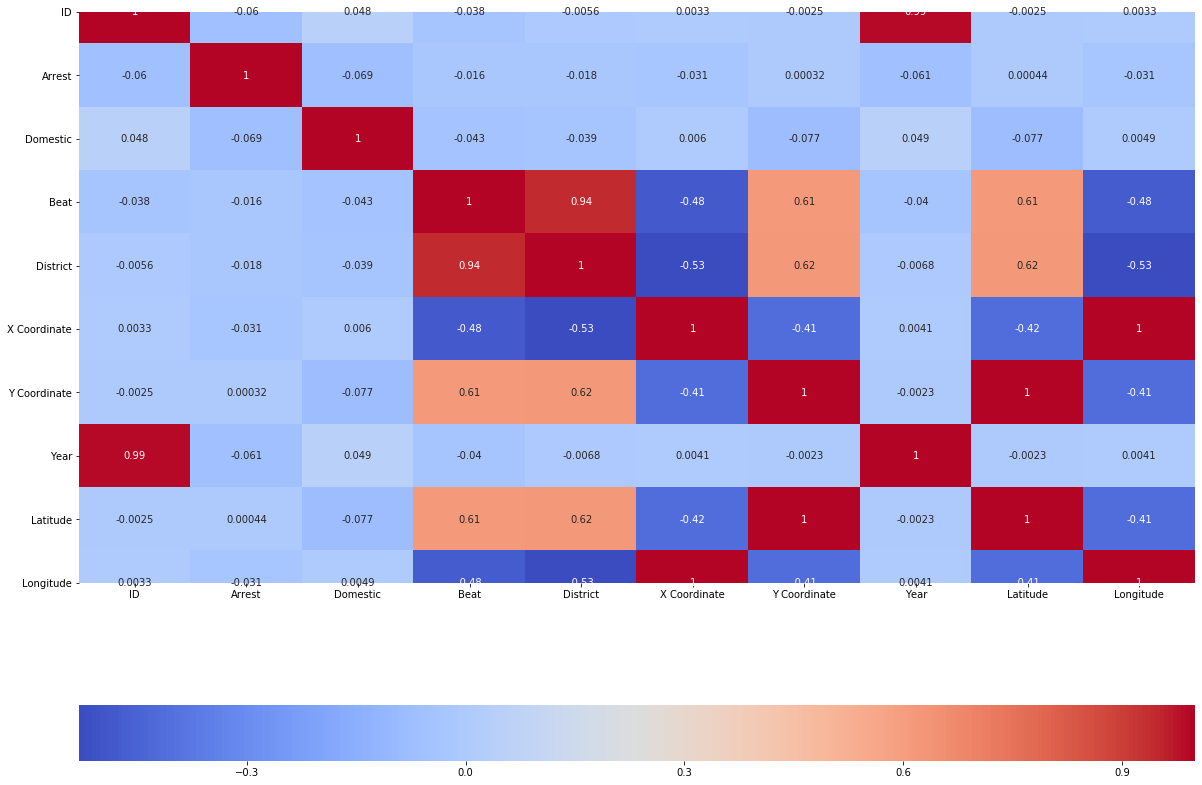

In [17]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'})


## Which crimes are most frequently committed?

In [18]:
chcgo_crime_count = pd.DataFrame(df[['Primary Type']].groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

In [19]:
chcgo_crime_count.shape

(35, 2)

In [20]:
chcgo_crime_count.head()

,Primary Type,counts
0,THEFT,1476030
1,BATTERY,1285256
2,CRIMINAL DAMAGE,799295
3,NARCOTICS,718268
4,ASSAULT,440974


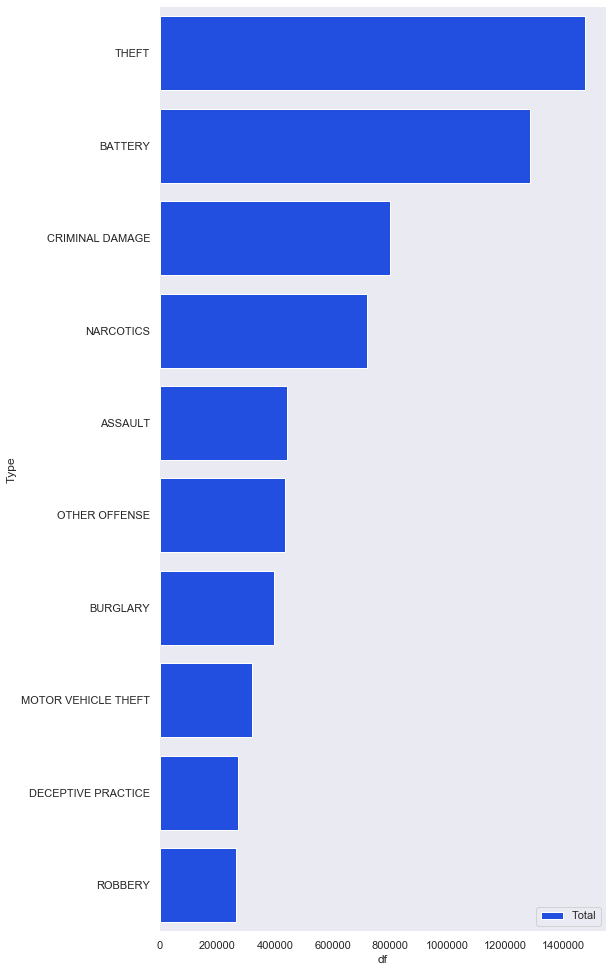

In [21]:
import seaborn as sns

sns.set(style="dark")

f, ax = plt.subplots(figsize=(8, 17))

sns.set_color_codes("bright")
sns.barplot(x="counts", y="Primary Type", data=chcgo_crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="df")
sns.despine(left=True, bottom=True)

plt.show()


## Which locations are these frequent crimes being committed to?

In [22]:
chcgo_crime_count_loc = pd.DataFrame(df[['Location Description']].groupby('Location Description').size().sort_values(ascending=False).rename('counts').reset_index())

In [23]:
chcgo_crime_count_loc.head()

,Location Description,counts
0,STREET,1824405
1,RESIDENCE,1177459
2,APARTMENT,733327
3,SIDEWALK,685066
4,OTHER,264865


In [24]:
chcgo_crime_count_loc.shape

(180, 2)

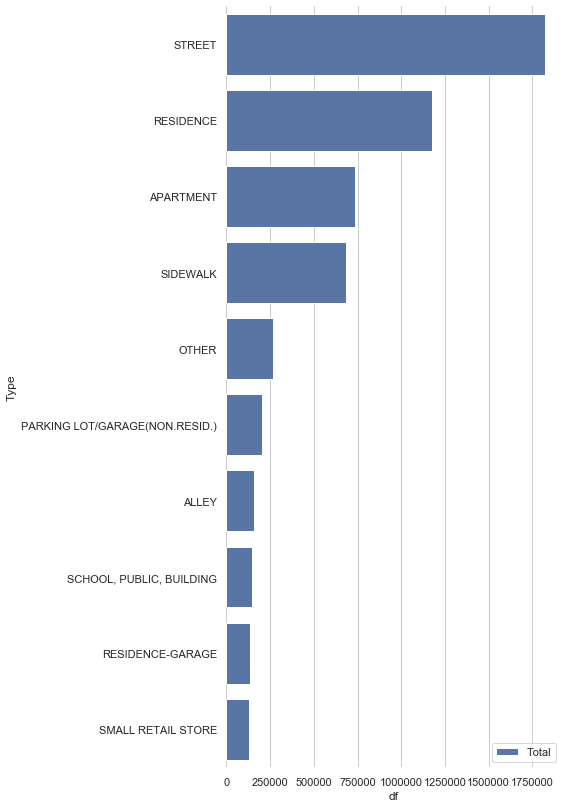

In [25]:
import seaborn as sns

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 14))

sns.set_color_codes("deep")
sns.barplot(x="counts", y="Location Description", data=chcgo_crime_count_loc.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="df")
sns.despine(left=True, bottom=True)

plt.show()




## Arrests

In [26]:
df_2012 = df.loc['2012']
df_2013 = df.loc['2013']
df_2014 = df.loc['2014']
df_2015 = df.loc['2015']
df_2016 = df.loc['2016']
df_2017 = df.loc['2017']
df_2017 = df.loc['2018']
df_2017 = df.loc['2019']
df_2017 = df.loc['2020']
yearly_arrests = df[df['Arrest'] == True]['Arrest']

In [27]:
print(yearly_arrests.head())

Date
2019-04-07 04:08:00    True
2019-04-20 20:50:00    True
2019-04-21 06:00:00    True
2019-05-20 13:00:00    True
2019-05-21 12:32:00    True
Name: Arrest, dtype: bool


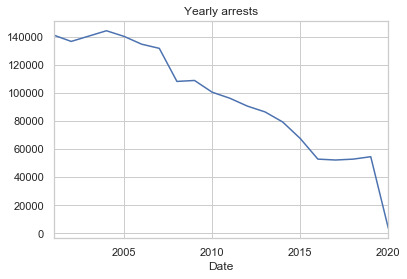

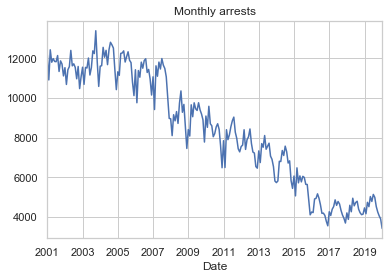

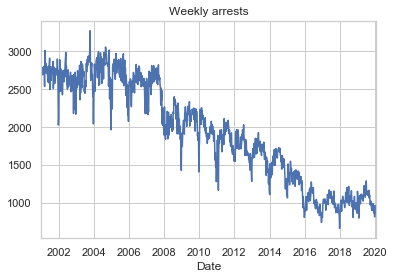

In [28]:
plt.subplot()

yearly_arrests.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()

yearly_arrests.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()

yearly_arrests.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()

plt.show()
plt.show()

## To be continued...